In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [2]:
from tqdm import tqdm

In [3]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Checking Whether there's an association between the building years of houses and the selling prices

<AxesSubplot:ylabel='Frequency'>

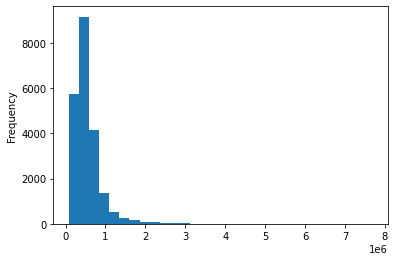

In [7]:
df['price'].plot(kind = 'hist', bins = 30)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

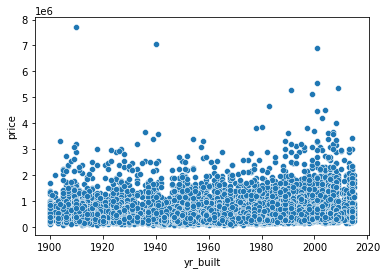

In [8]:
sns.scatterplot(data = df, x = 'yr_built', y = 'price')

In [9]:
df.groupby(['yr_built'])['price'].agg(['median']).apply(lambda x: x.sort_values(ascending=False).head(10))

,median
yr_built,
2015,629500.0
1902,624000.0
1911,606000.0
1927,605000.0
2014,599000.0
1905,597500.0
1907,595000.0
2001,585000.0
1909,575500.0


<AxesSubplot:xlabel='yr_built'>

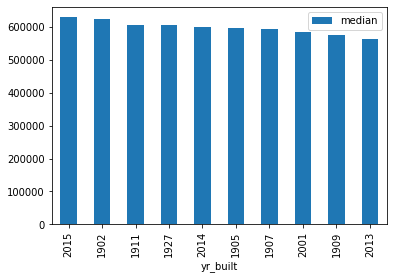

In [10]:
df.groupby(['yr_built'])['price'].agg(['median']).apply(lambda x: x.sort_values(ascending=False).head(10)).plot(kind = 'bar')

THe median selling price is 45000 dollars. The houses built in 2015, the newer ones according to our dataset have higher median prices. This seems to be reasonable but it would be interesting to understand if this effect is due to chance.
With "due to chance" we are referring to the fact that we are observing only a sample of the entire population. The data we have at our disposal is limited to only a part of all the house transactions that happened b/w 2014 and 2015 in King county. There may be more houses built in 2015 that are sold in this period and aren't recorded in out dataset

The best we can do in this situation is to take note of the limitations and try to estimate the real median of the sold houses built in 2015. We can do this through simulations

In [11]:
year = 2015
y = df[df['yr_built'] == year]['price'].agg(['count', 'median'])
observed_diff = abs(y['median'] - df['price'].median())

We want to check if our observed_diff might as well be registered by any random subgroup of sales. We randomly sample groups of the same size as 2015's  houses and compute the difference between their median prices and the dataset's median prices

In [12]:
n_simulations = 1000
sampling = lambda x, y: x['price'].sample(n=int(y['count']))

sim_diffs = np.asarray([
    abs(sampling(df,y).median() - df['price'].median())
    for i in tqdm(range(n_simulations))
])

100%|██████████| 1000/1000 [00:01<00:00, 648.84it/s]


We verify how many times the simulated price differences are higher than our observed difference. This value can be interpreted as the probability of success and represents our estimated p_value

In [13]:
p_value = np.mean(sim_diffs >= observed_diff)

In [14]:
p_value

0.0

With a lower p_value = 0, we are more confident to reject the null hypothesis that states there is no price difference between 2015's houses and the other ones.

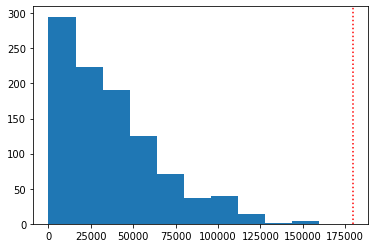

In [15]:
plt.hist(sim_diffs)
plt.axvline(observed_diff, color = 'red', linestyle = 'dotted')

100%|██████████| 1000/1000 [00:01<00:00, 639.13it/s]

p_value: 0.007


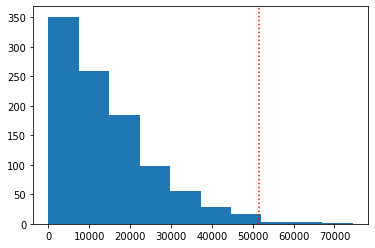

In [16]:
year = 1950
y = df[df['yr_built'] == year]['price'].agg(['count', 'median'])
observed_diff = abs(y['median'] - df['price'].median())
n_simulations = 1000
sampling = lambda x, y: x['price'].sample(n=int(y['count']))

sim_diffs = np.asarray([
    abs(sampling(df,y).median() - df['price'].median())
    for i in tqdm(range(n_simulations))
])
p_value = np.mean(sim_diffs >= observed_diff)
print(f"p_value: {p_value}")
plt.hist(sim_diffs)
plt.axvline(observed_diff, color = 'red', linestyle = 'dotted')

### MULTIVARIATE SIMULATION